# Salary Predictions Based on Job Descriptions

### ---- 1 Define the problem ----

Trying to predict the salary of the employee for the specific job posting.

In [1]:
#import your libraries
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats import norm

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

__author__ = "Vivek Reddy Devi"
__email__ = "vdevi15494@gmail.com"

C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### ---- 2 Load & preparing the data ----

In [2]:
#load the data into a Pandas dataframe

train_features = pd.read_csv("train_features.csv")
train_target =pd.read_csv("train_salaries.csv")
test_data =pd.read_csv("test_features.csv")

In [3]:
train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
train_target.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [6]:
#Renaming the column labels
train_features = train_features.rename(columns={'jobId': 'jobID', 
                        'companyId': 'companyID',
                        'jobType': 'jobtype',
                        'degree': 'degree',
                        'major': 'major',
                        'industry': 'industry',
                        'yearsExperience': 'experience',
                        'milesFromMetropolis' : 'distance_metro',
                        })

train_target = train_target.rename(columns={'jobId': 'jobID'})

test_data= test_data.rename(columns={'jobId': 'jobID', 
                        'companyId': 'companyID',
                        'jobType': 'jobtype',
                        'degree': 'degree',
                        'major': 'major',
                        'industry': 'industry',
                        'yearsExperience': 'experience',
                        'milesFromMetropolis' : 'distance_metro',
                        })

In [7]:
#combining training features and training target variables for ease of analysis
train_data = pd.merge(train_features, train_target, on='jobID')

### ---- 3 Exploring and cleaning the data----

In [8]:
#Viewing few records of the data

In [9]:
train_data.head()

,jobID,companyID,jobtype,degree,major,industry,experience,distance_metro,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [10]:
test_data.head()

,jobID,companyID,jobtype,degree,major,industry,experience,distance_metro
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobID             1000000 non-null object
companyID         1000000 non-null object
jobtype           1000000 non-null object
degree            1000000 non-null object
major             1000000 non-null object
industry          1000000 non-null object
experience        1000000 non-null int64
distance_metro    1000000 non-null int64
salary            1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobID             1000000 non-null object
companyID         1000000 non-null object
jobtype           1000000 non-null object
degree            1000000 non-null object
major             1000000 non-null object
industry          1000000 non-null object
experience        1000000 non-null int64
distance_metro    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


From initial exploration, it can be observed that train and test features have 6 categorical features and 2 numerical features

In [13]:
#Summarizing the numerical and categorical features seperately

In [14]:
train_data.describe()

,experience,distance_metro,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [15]:
train_data.describe(include=['O'])

,jobID,companyID,jobtype,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684522007,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [16]:
test_data.describe()

,experience,distance_metro
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [17]:
test_data.describe(include=['O'])

,jobID,companyID,jobtype,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362686346566,COMP13,VICE_PRESIDENT,HIGH_SCHOOL,NONE,SERVICE
freq,1,16130,125434,238255,534068,143161


In [18]:
#checking for duplicates

train_data.duplicated().sum()

0

In [19]:
test_data.duplicated().sum()


0

In [20]:
#Checking for outliers in target as the ouptut is numerical

In [21]:
salary_stats = train_data.salary.describe()

In [22]:
#Using IQR rule to identify potential outliers
IQR = salary_stats['75%'] - salary_stats['25%']
upper = salary_stats['75%'] + 1.5 * IQR
lower = salary_stats['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

The upper and lower bounds for suspected outliers are 220.5 and 8.5.


In [23]:
#checking for potential outlier below lower bound
train_data[train_data.salary < 8.5]

,jobID,companyID,jobtype,degree,major,industry,experience,distance_metro,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


CTO, MANAGER, VICE_PRESIDENT salaries can't be 0 and the 0 salaries wont make sense for the rest as well. We can assume that these are corrupted data.

In [24]:
#Remove data with zero salaries
train_data = train_data[train_data.salary > 8.5]

In [25]:
#check potential outlier above upper bound
train_data.loc[train_data.salary > 222.5, "jobtype"].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobtype, dtype: int64

The chances of junior role having higher salary is not normal, further information on this area is required.


In [26]:
train_data[(train_data.salary > 222.5) & (train_data.jobtype == 'JUNIOR')]

,jobID,companyID,jobtype,degree,major,industry,experience,distance_metro,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


All the roles have highest degrees with major in business, engineering and computer science and are in the fields of Finance, Oil and Web. It's safe to assume that these are legitimate.

### --- 4 Exploratory Data Analysis---

C:\Users\vivek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 116.06 and sigma = 38.72



Text(0.5,1,'Box plot distribution representation')

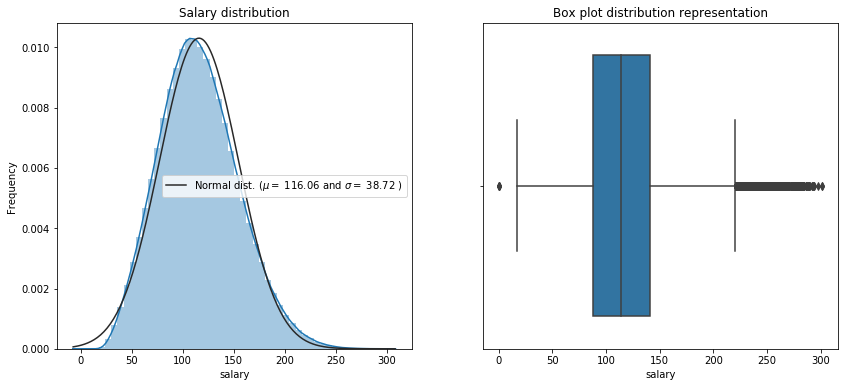

In [27]:
#Checking if the dependent variable is normally dis
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.distplot(train_target['salary'] , fit=norm);

# Getting the fitted parameters used by the function
(mu, sigma) = norm.fit(train_target['salary'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Salary distribution')

plt.subplot(1,2,2)
sns.boxplot(train_target.salary)
plt.title('Box plot distribution representation')




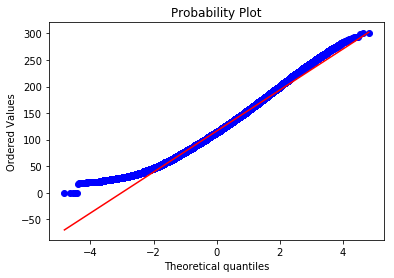

In [28]:
#Also plotting a QQ-plot for further confirmation of normal distribution
fig = plt.figure()
res = stats.probplot(train_target['salary'], plot=plt)
plt.show()


The salaries histogram is almost normally distributed

In [29]:
#summarizing each variable by doing unique value counts of all the columns

#CREATE SUBPLOTS

def plot_summary(df, col):
    sns.catplot(x=col, kind="count", data=df)
    plt.xticks(rotation='90')
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Counts', fontsize=15)
    plt.title('Feature value counts', fontsize=15)
    #print(train_data[col].value_counts())

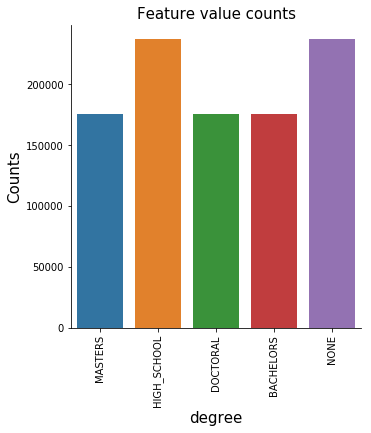

In [30]:
plot_summary(train_data, 'degree')

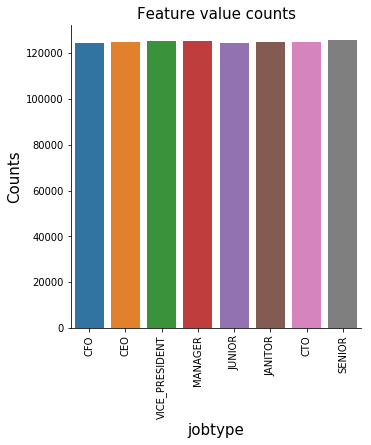

In [31]:
plot_summary(train_data, 'jobtype')

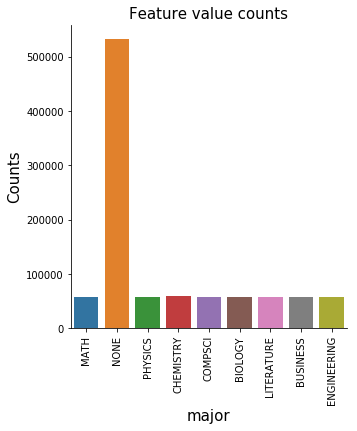

In [32]:
plot_summary(train_data, 'major')

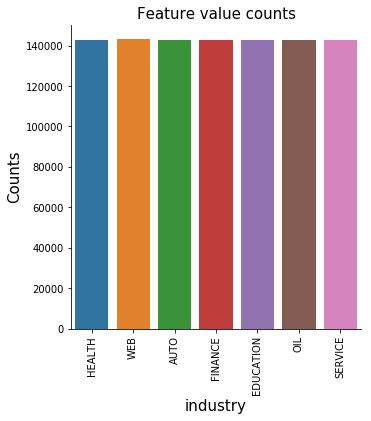

In [33]:
plot_summary(train_data, 'industry')

In [34]:
def plot_feature(df, col):
    '''
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()


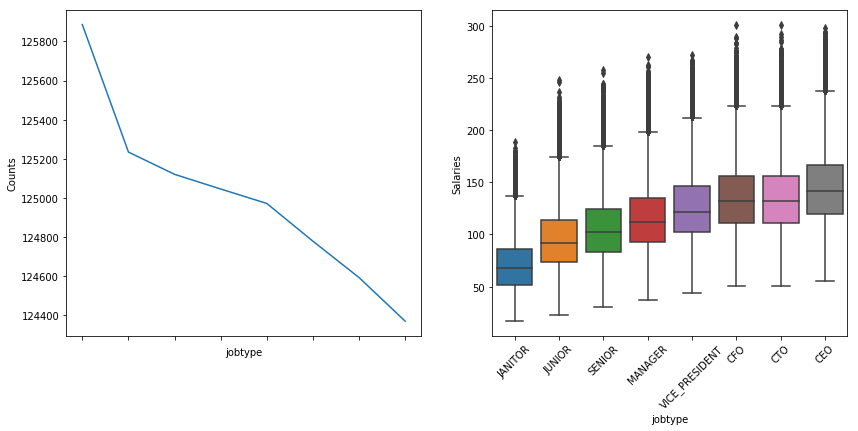

In [35]:
plot_feature(train_data, 'jobtype')

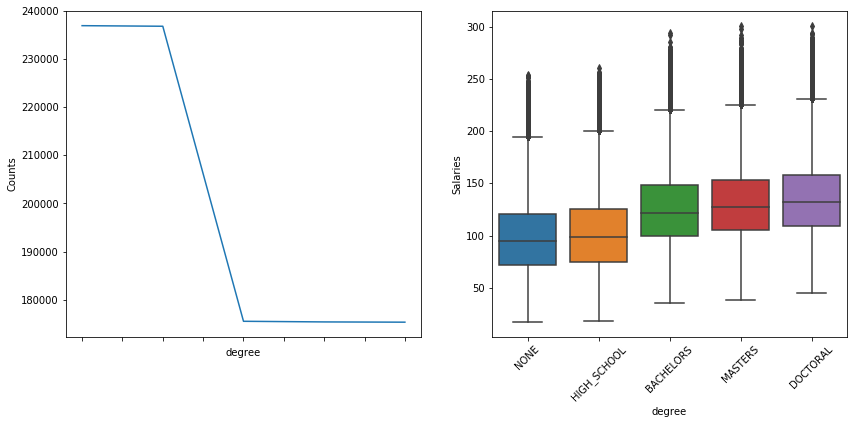

In [36]:
plot_feature(train_data, 'degree')

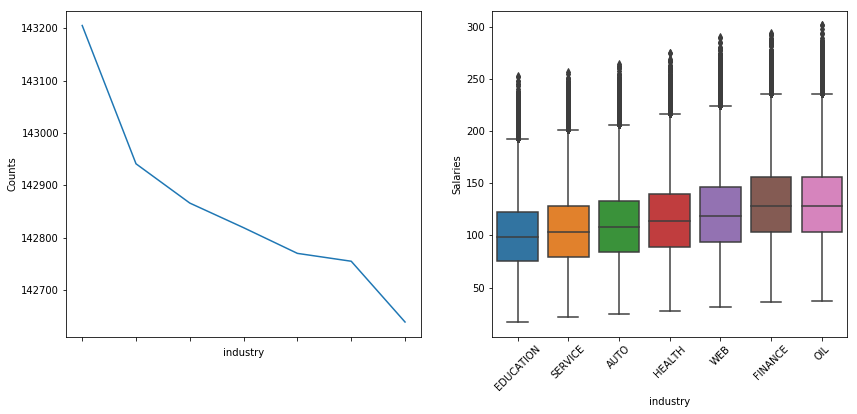

In [37]:
plot_feature(train_data, 'industry')

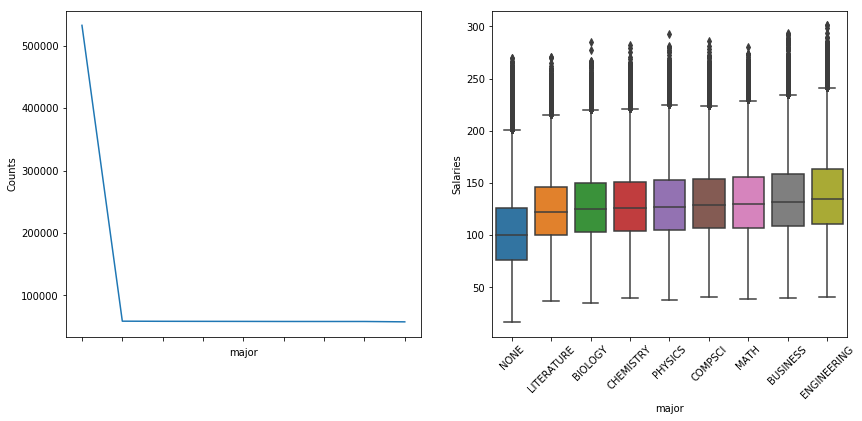

In [38]:
plot_feature(train_data, 'major')

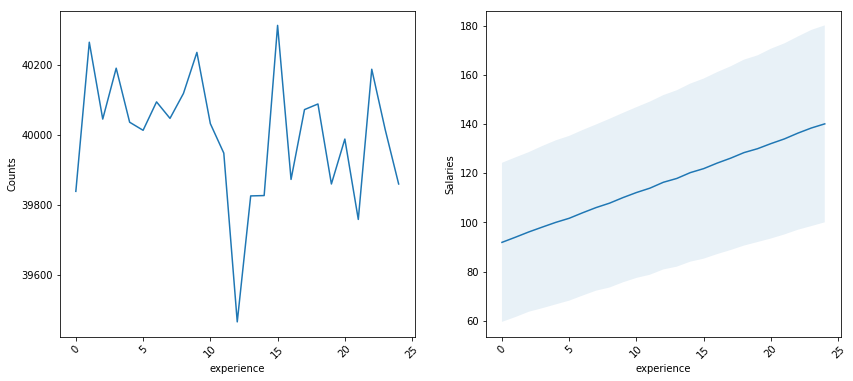

In [39]:
plot_feature(train_data, 'experience')

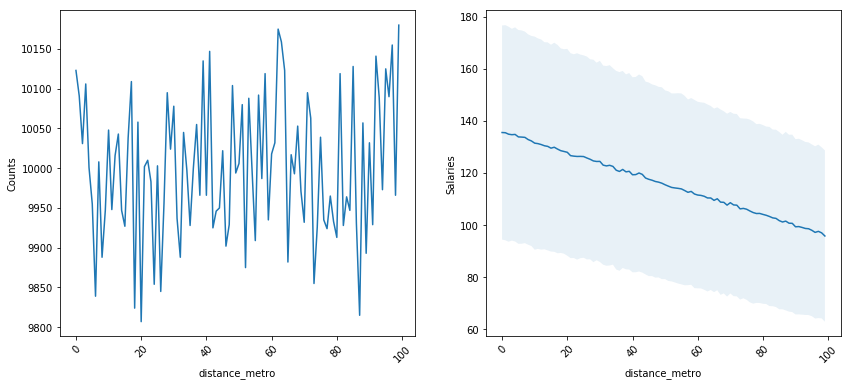

In [40]:
plot_feature(train_data, 'distance_metro')

# --- 5 Engineering Features ---

In [41]:
train_data = train_data.set_index('jobID')
train_set1 = train_data
train_set2 = train_data

Transforming categorical variables by one hot encoding

In [42]:
cat_variables = ['jobtype', 'degree', 'industry', 'major']
def get_dummies(df, col):
    colLabel = pd.get_dummies(df[col])
    df = pd.concat([df, colLabel], axis=1)
    return df

for cat in cat_variables:
    train_set1 = get_dummies(train_set1, cat)

Transforming categorical variables by feature hashing

In [43]:
from sklearn.feature_extraction import FeatureHasher


def feature_hasher(n, df, col):
    fh = FeatureHasher(n_features=n, input_type='string')
    hashed_col = fh.fit_transform(df[col])
    hashed_col = hashed_col.toarray()
    colLabel = pd.DataFrame(hashed_col, index=df.index)
    df = pd.concat([df, colLabel], axis=1)
    return df

for cat in cat_variables:
    train_set2 = feature_hasher(5, train_set2, cat)


Creating train and validation set


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Create the X and y set
X1 = train_set1.drop(['companyID', 'jobtype', 'degree',  'major', 'industry', 'salary'], axis=1)
y1 = train_set1[['salary']]

X2 = train_set2.drop(['companyID', 'jobtype', 'degree',  'major', 'industry', 'salary'], axis=1)
y2 = train_set2[['salary']]

# Define train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.30, random_state=12)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.30, random_state=12)

In [45]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [46]:
reg= LinearRegression()
reg.fit(X1_train, y1_train)
reg.score(X1_test, y1_test)

0.744214470812552

In [47]:
reg.fit(X2_train, y2_train)
reg.score(X2_test, y2_test)

0.6919715195474646

In [48]:
forest_reg = RandomForestRegressor()

In [49]:
forest_reg.fit(X1_train, y1_train)
forest_reg.score(X1_test, y1_test)

C:\Users\vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.6899215872094107

In [50]:
forest_reg.fit(X2_train, y2_train)
forest_reg.score(X2_test, y2_test)

C:\Users\vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.6896567888110693

# ---- WORK IN PROGRESS---

### Areas of improvements
###### 1. Working on better models
###### 2. Hypertuning model parameters
###### 3. Using MSE to measure the model performace